In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The GSI's Defense ##

In [2]:
# Read in the data from 'scores_by_section.csv'
scores = ...
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
# We need to know how many students were in Section 3
# How can Python show us the number of students in each section?
...

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
# Notice that Section 3 has 27 students.

# Show the average score on the midterm for each section
...

Section,Midterm mean
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
# We have a real-world data point
# Our statistic is the average (mean) of 27 scores in Section 3
observed_average = 13.6667 

In [6]:
# For comparison, compute the overall mean for all students in the course
...

15.493036211699165

We're using sample mean as our test statistic. Recall from the earlier slide, we should ask some questions about this:
  - What values of the statistic will be consistent with the null hypothesis?
  - What values of the statistic will support the alternative?

In [7]:
# Now we need to simulate our statistic repeatedly to create an
# empirical distribution for the sample mean under the null hypothesis

# First, understand how to create one simulated value of the statistic

# We start with a random sample of 27 students to match the sample size for Section 3
sample_size = 27
random_sample = scores.sample(sample_size, with_replacement=False)
random_sample

Section,Midterm
8,16
8,8
3,23
8,16
8,13
3,0
9,4
4,22
1,21
6,17


In [9]:
# What is the simulated value of the statistic for one sample?
...

14.62962962962963

In [12]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    '''
    Returns the average score for a random sample of size 27 from all the scores
    '''
    ...
    ...
    ...

random_sample_midterm_avg()

16.111111111111111

In [16]:
# Simulate 50,000 copies of the test statistic
repetitions = 50000
sample_averages = ...
for ...
    ...
    ...

print(len(sample_averages))
sample_averages

50000


array([ 15.51851852,  15.51851852,  16.48148148, ...,  15.62962963,
        15.59259259,  17.85185185])

## Our Decision

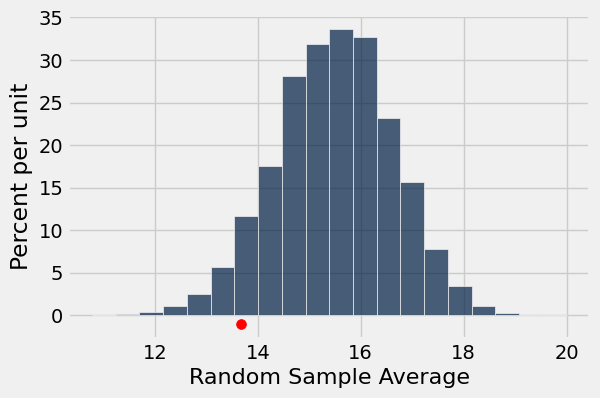

In [17]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

# Make a 1-column table of the sample_averages
averages_tbl = Table().with_column('Random Sample Average', sample_averages)

# Draw the histogram using 20 equal-width bars
averages_tbl.hist(bins = 20)

# Add a big red dot at x = observed_average, y = -0.01 (negative 1%)
plots.scatter(observed_average, -0.01, color='red', s=50);

**Back to slides***

## Measuring Significance

The observed average is not so low as to be "off the scale" of the predictions made under the null hypothesis. 

To reach a decision between the two hypotheses, we should test whether the P-value is statistically significant (less than .05). There are two approaches to doing so.

### Approach 1

In [18]:
# (1) Calculate the p-value, i.e., find the simulation area beyond observed value
# in the direction of support for the alternative hypothesis

# In the histrogram, areas are proportions. What proportion of the 
# simulated sample means are <= the observed mean?
np.count_nonzero(sample_averages <= observed_average) / 50000

# (2) See if this is less than 5%

0.05858

The GSI is vindicated. According to the "P < .05" convention, there is a reasonble chance that the observed low mean on the midterm exam for Section 3 was due to nothing more than random variation. We cannot reject the null hypothesis here.

### Approach 2

In [19]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500
# That is, find the 5th-percentile of the simulated sample mean data
five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.592592592592593

In [20]:
# (2) If the observed average is below the five_percent_point, it is 
# significantly lower than expected and we reject the null
observed_average

13.6667

### Visual Representation

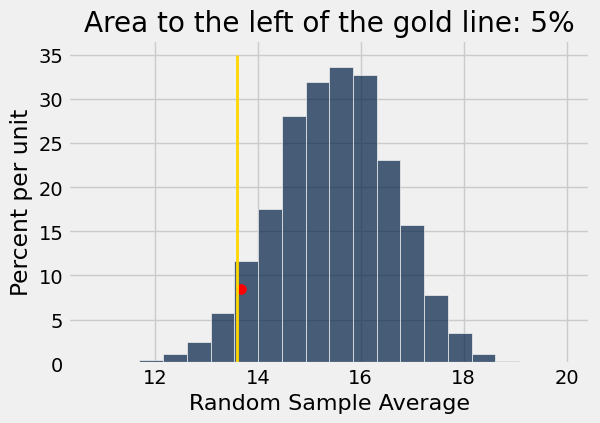

In [21]:
# Add a vertical gold line at the five_percent_point
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');

# Put the red dot higher, so it sits on top of the bar
plots.scatter(observed_average, .085, color='red', s=50);

The center of the red dot is to the right of the 5% line. Low values of the statistic support the alternative, so this is another way to see that the null hypthoses is not rejected under the standard "P < .05" cutoff for statistical significance.

**Back to Slides...**